In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

from sklearn.model_selection import train_test_split
import wrangle_zillow as wg

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wg.acquire()

In [3]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [4]:
df = wg.handle_missing_values(df, 0.5, 0.5)

In [5]:
id_cols = [col for col in df.columns if 'typeid' in col or col in ['id', 'parcelid']]
df = df.drop(columns=id_cols)

In [6]:
wg.overview(df)

--- Shape: (43346, 29)

--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43346 entries, 1 to 52318
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   43346 non-null  float64
 1   bedroomcnt                    43346 non-null  float64
 2   calculatedbathnbr             43337 non-null  float64
 3   calculatedfinishedsquarefeet  43346 non-null  float64
 4   finishedsquarefeet12          43338 non-null  float64
 5   fips                          43346 non-null  float64
 6   fullbathcnt                   43337 non-null  float64
 7   latitude                      43346 non-null  float64
 8   longitude                     43346 non-null  float64
 9   lotsizesquarefeet             43084 non-null  float64
 10  propertycountylandusecode     43346 non-null  object 
 11  propertyzoningdesc            32983 non-null  object 
 12  rawcensustractandblock     

In [7]:
wg.overview(df)

--- Shape: (43346, 29)

--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43346 entries, 1 to 52318
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   43346 non-null  float64
 1   bedroomcnt                    43346 non-null  float64
 2   calculatedbathnbr             43337 non-null  float64
 3   calculatedfinishedsquarefeet  43346 non-null  float64
 4   finishedsquarefeet12          43338 non-null  float64
 5   fips                          43346 non-null  float64
 6   fullbathcnt                   43337 non-null  float64
 7   latitude                      43346 non-null  float64
 8   longitude                     43346 non-null  float64
 9   lotsizesquarefeet             43084 non-null  float64
 10  propertycountylandusecode     43346 non-null  object 
 11  propertyzoningdesc            32983 non-null  object 
 12  rawcensustractandblock     

In [8]:
df = df[df.propertylandusedesc == 'Single Family Residential']

In [9]:
df.shape

(43346, 29)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43346 entries, 1 to 52318
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   43346 non-null  float64
 1   bedroomcnt                    43346 non-null  float64
 2   calculatedbathnbr             43337 non-null  float64
 3   calculatedfinishedsquarefeet  43346 non-null  float64
 4   finishedsquarefeet12          43338 non-null  float64
 5   fips                          43346 non-null  float64
 6   fullbathcnt                   43337 non-null  float64
 7   latitude                      43346 non-null  float64
 8   longitude                     43346 non-null  float64
 9   lotsizesquarefeet             43084 non-null  float64
 10  propertycountylandusecode     43346 non-null  object 
 11  propertyzoningdesc            32983 non-null  object 
 12  rawcensustractandblock        43346 non-null  float64
 13  r

In [13]:
cols_to_drop = ['calculatedbathnbr',
                'finishedsquarefeet12', 
                'regionidcity',
                'landtaxvaluedollarcnt',
                'taxamount',
                'rawcensustractandblock',
                'roomcnt',
                'regionidcounty']
df = df.drop(columns = cols_to_drop)

In [ ]:
df.info()

In [16]:
df = wg.handle_missing_values(df, 0.5, 0.5)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43346 entries, 1 to 52318
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   43346 non-null  float64
 1   bedroomcnt                    43346 non-null  float64
 2   calculatedfinishedsquarefeet  43346 non-null  float64
 3   fips                          43346 non-null  float64
 4   fullbathcnt                   43337 non-null  float64
 5   latitude                      43346 non-null  float64
 6   longitude                     43346 non-null  float64
 7   lotsizesquarefeet             43084 non-null  float64
 8   propertycountylandusecode     43346 non-null  object 
 9   propertyzoningdesc            32983 non-null  object 
 10  regionidzip                   43342 non-null  float64
 11  unitcnt                       33019 non-null  float64
 12  yearbuilt                     43327 non-null  float64
 13  s

In [17]:
df.heatingorsystemdesc.info()

<class 'pandas.core.series.Series'>
Int64Index: 43346 entries, 1 to 52318
Series name: heatingorsystemdesc
Non-Null Count  Dtype 
--------------  ----- 
33561 non-null  object
dtypes: object(1)
memory usage: 677.3+ KB


In [ ]:
for col in df.columns:
    list(df[col])

In [ ]:

sns.boxplot(data=df, x='fips', y='logerror')
plt.show()

In [18]:
def train_validate_test_split(df, test_size=.2, validate_size=.3, random_state=99):
    '''
    This function takes in a dataframe, then splits that dataframe into three separate samples
    called train, test, and validate, for use in machine learning modeling.
    Three dataframes are returned in the following order: train, test, validate. 
    
    The function also prints the size of each sample.
    '''
    # split the dataframe into train and test
    train, test = train_test_split(df, test_size=.2, random_state=99)
    # further split the train dataframe into train and validate
    train, validate = train_test_split(train, test_size=.3, random_state=99)
    # print the sample size of each resulting dataframe
    print(f'train\t n = {train.shape[0]}')
    print(f'test\t n = {test.shape[0]}')
    print(f'validate n = {validate.shape[0]}')

    return train, validate, test

In [ ]:
train, validate, test = train_validate_test_split(df)

In [ ]:
train_sample = train.sample(n=10000)

In [ ]:
import plotly as px

In [ ]:
# visualize
sns.boxplot(data=train, x='fips', y='logerror')
plt.show()

# Question 1

Is log error significantly different for properties in the three counties?

Null hypothesis: Log error will be the same across all three counties.
Alternative hypothesis: Log error will vary based on county.

In [19]:
#Look at the distribution of fips in the dataset
df['fips'].value_counts()

6037.0    33044
6059.0     5989
6111.0     4313
Name: fips, dtype: int64

In [20]:
#Create a dictionary mapping the fips values to the counties
county_dict = {6037.0: 'LA County', 6059.0: 'Orange County',
               6111.0: 'Ventura County'}

In [21]:
#Replace the fips numbers with county names
df['fips'].replace(county_dict, inplace=True)
df.rename(columns={'fips': 'county'}, inplace=True)

df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,county,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertyzoningdesc,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
1,1.0,2.0,1465.0,Ventura County,1.0,34449266.0,-119281531.0,12647.0,1110,NaN,...,NaN,1967.0,88000.0,464000.0,2016.0,6.111001e+13,0.055619,2017-01-01,NaN,Single Family Residential
2,2.0,3.0,1243.0,Orange County,2.0,33886168.0,-117823170.0,8432.0,122,NaN,...,NaN,1962.0,85289.0,564778.0,2016.0,6.059022e+13,0.005383,2017-01-01,NaN,Single Family Residential
3,3.0,4.0,2376.0,LA County,3.0,34245180.0,-118240722.0,13038.0,0101,LCR110000*,...,1.0,1970.0,108918.0,145143.0,2016.0,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential
4,3.0,4.0,2962.0,LA County,3.0,34145202.0,-118179824.0,63000.0,0101,PSR2,...,1.0,1950.0,276684.0,773303.0,2016.0,6.037461e+13,-0.001011,2017-01-01,Central,Single Family Residential
6,3.0,4.0,3039.0,LA County,3.0,33960230.0,-118006914.0,20028.0,0100,WHRE20000*,...,1.0,1970.0,177527.0,220583.0,2016.0,6.037500e+13,-0.040966,2017-01-02,Central,Single Family Residential


Variance of logerror for LA County.
0.028189031378078766
Variance of logerror for Orange County.
0.03941147277481179
Variance of logerror for Ventura County.
0.023672885013389756


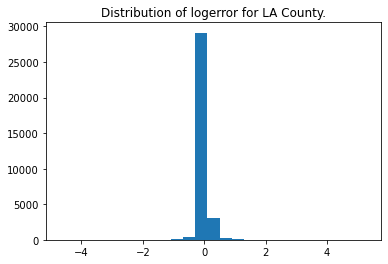

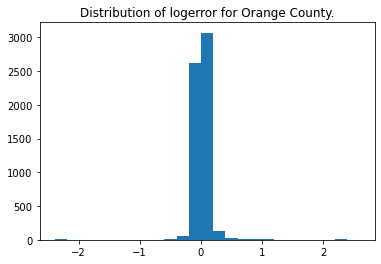

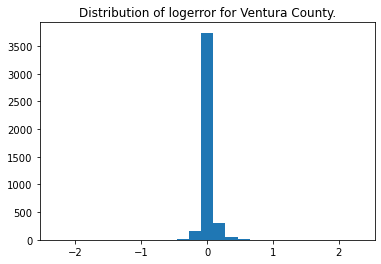

In [22]:
#Loop through my counties and plot the distribution of the target variable
county_list = ['LA County', 'Orange County', 'Ventura County']

for county in county_list:
    print('Variance of logerror for {}.'.format(county))
    print(df[df['county'] == county].logerror.var())
    
    plt.figure()
    plt.title('Distribution of logerror for {}.'.format(county))
    plt.hist(df[df['county'] == county].logerror, bins=25)


In [26]:
#Conduct an ANOVA test between the counties
f_county, p_county = stats.f_oneway(df[df['county'] == 'LA County'].logerror,
                                    df[df['county'] == 'Orange County'].logerror,
                                    df[df['county'] == 'Ventura County'].logerror)

f_county, p_county

AttributeError: module 'scipy' has no attribute 'f_oneway'

In [27]:
#Compare my p value to alpha
if p_county < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

NameError: name 'p_county' is not defined

# Question 2

What is driving the difference in log error between the counties? Maybe Orange County has homes of all ages, and that makes it difficult to correctly predict the price!

Null hypothesis: The average age of homes in Orange County is the same as the overall age of homes in the dataset.
Alternative hypothesis: The average age of homes in Orange County is different from the overall mean of the dataset.

<AxesSubplot:xlabel='county', ylabel='yearbuilt'>

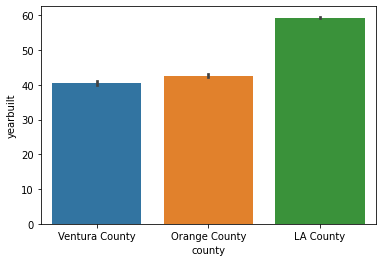

In [32]:
age = 2017 - df.yearbuilt

#The average age of houses in each county
sns.barplot(x='county', y=age, data=df)

In [33]:
#A better way to visualize the distribution of ages
sns.boxplot(x='county', y='age', data=df)

ValueError: Could not interpret input 'age'

In [ ]:
print(df[df['county'] == 'Orange County'].age.var())
print(df['age'].var())